
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp



An object of class Seurat 
23057 features across 8900 samples within 1 assay 
Active assay: RNA (23057 features, 0 variable features)

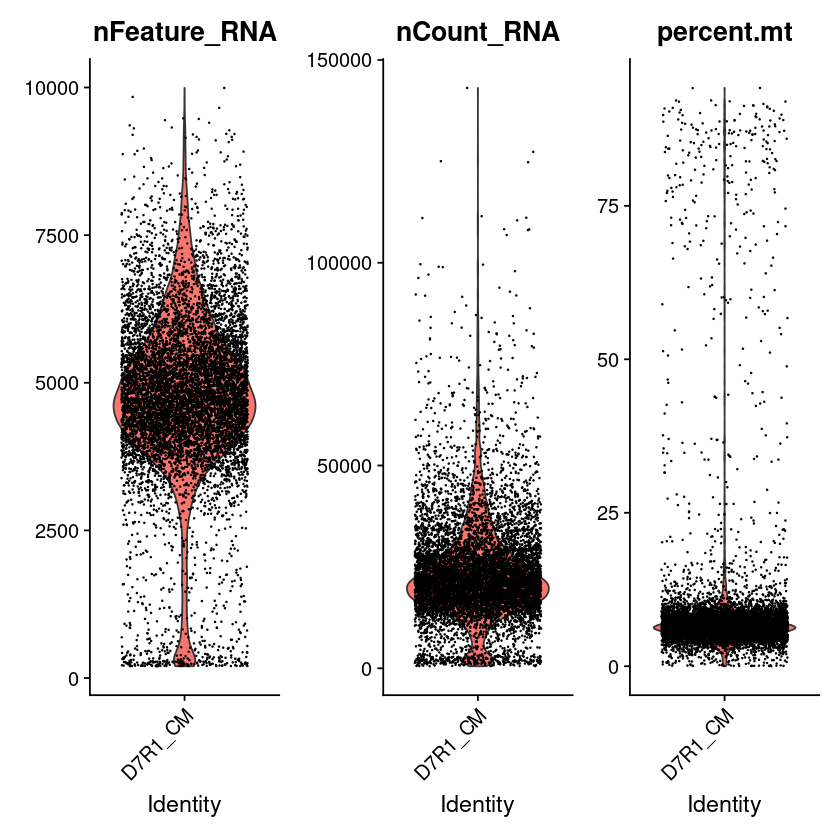

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)

# importing data 
D7R1_CM.data <- Read10X(data.dir = "/volume/DAY_0/D7R1_CM/D7R1_CM_DATA")
D7R1_CM <- CreateSeuratObject(counts = D7R1_CM.data, project = "D7R1_CM", min.cells = 3, min.features = 200)
D7R1_CM

# Violin Plot
D7R1_CM[["percent.mt"]] <- PercentageFeatureSet(D7R1_CM, pattern = "^MT-")

VlnPlot(D7R1_CM, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# SUBSET DATA
D7R1_CM <- subset(D7R1_CM, subset = nFeature_RNA > 2000 & nFeature_RNA < 9200 & percent.mt < 17)

# SAVE
saveRDS(D7R1_CM, file = "/volume/DAY_0/D7R1_CM/D7R1_CM_final.rds")